# Loading Data

In [ ]:
!kaggle datasets download -d sripaadsrinivasan/audio-mnist

Dataset URL: https://www.kaggle.com/datasets/sripaadsrinivasan/audio-mnist
License(s): CC0-1.0
 99% 940M/948M [00:11<00:00, 131MB/s]
100% 948M/948M [00:12<00:00, 82.8MB/s]


In [ ]:
!unzip /content/audio-mnist.zip

Streaming output truncated to the last 5000 lines.
  inflating: data/51/0_51_1.wav      
  inflating: data/51/0_51_10.wav     
  inflating: data/51/0_51_11.wav     
  inflating: data/51/0_51_12.wav     
  inflating: data/51/0_51_13.wav     
  inflating: data/51/0_51_14.wav     
  inflating: data/51/0_51_15.wav     
  inflating: data/51/0_51_16.wav     
  inflating: data/51/0_51_17.wav     
  inflating: data/51/0_51_18.wav     
  inflating: data/51/0_51_19.wav     
  inflating: data/51/0_51_2.wav      
  inflating: data/51/0_51_20.wav     
  inflating: data/51/0_51_21.wav     
  inflating: data/51/0_51_22.wav     
  inflating: data/51/0_51_23.wav     
  inflating: data/51/0_51_24.wav     
  inflating: data/51/0_51_25.wav     
  inflating: data/51/0_51_26.wav     
  inflating: data/51/0_51_27.wav     
  inflating: data/51/0_51_28.wav     
  inflating: data/51/0_51_29.wav     
  inflating: data/51/0_51_3.wav      
  inflating: data/51/0_51_30.wav     
  inflating: data/51/0_51_31.wav     

#

In [ ]:
import librosa
import librosa.display as dsp
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import IPython.display as ipd
import os
import csv

In [ ]:

# Path to the directory containing the folders of audio files
root_directory = "data"

# Path to the CSV file where you want to save the information
csv_file = "dataset.csv"

# Function to extract label, folder number, and index from file name
def extract_info(file_name):
    parts = file_name.split('_')
    label = parts[0]
    folder_number = parts[1]
    index = parts[2].split('.')[0]
    return label, folder_number, index

# Initialize a list to store audio information
audio_info = []

# Iterate through each folder and collect audio information
for folder in os.listdir(root_directory):
    folder_path = os.path.join(root_directory, folder)
    if os.path.isdir(folder_path):
        for audio_file in os.listdir(folder_path):
            if audio_file.endswith('.wav'):
                label, folder_number, index = extract_info(audio_file)
                audio_info.append([os.path.join(folder_path, audio_file), label, folder_number, index])

# Write the information to the CSV file
with open(csv_file, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Audio Path', 'label', 'Folder Number', 'Index'])
    for row in audio_info:
        writer.writerow(row)

print("CSV file has been created successfully.")


CSV file has been created successfully.


In [ ]:
import pandas as pd
df=pd.read_csv("dataset.csv")

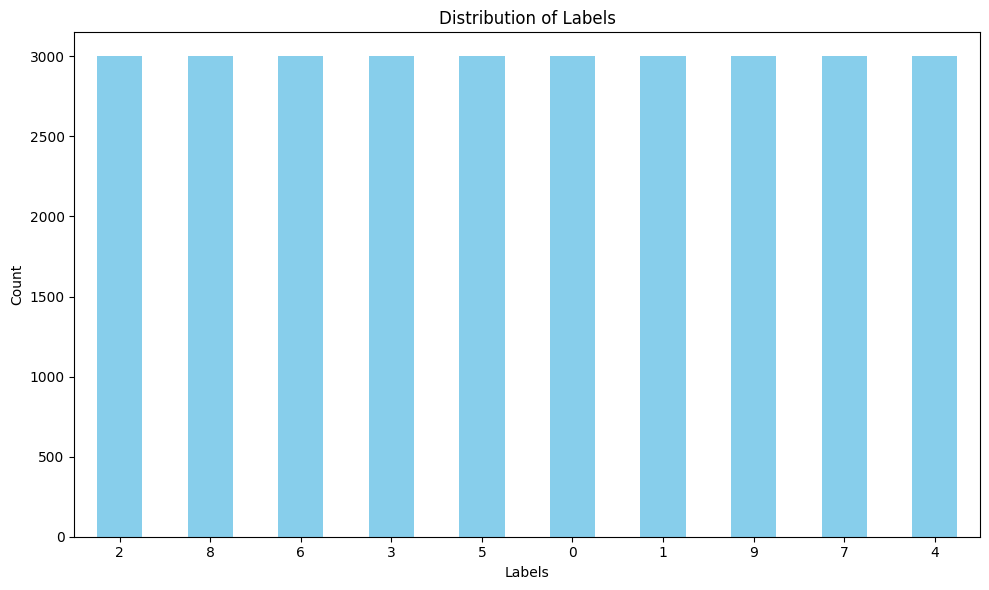

In [ ]:
# Group the DataFrame by the 'label' column and count the occurrences of each label
label_counts = df['label'].value_counts()

# Plotting the histogram
plt.figure(figsize=(10, 6))
label_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Labels')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability if necessary
plt.tight_layout()
plt.show()

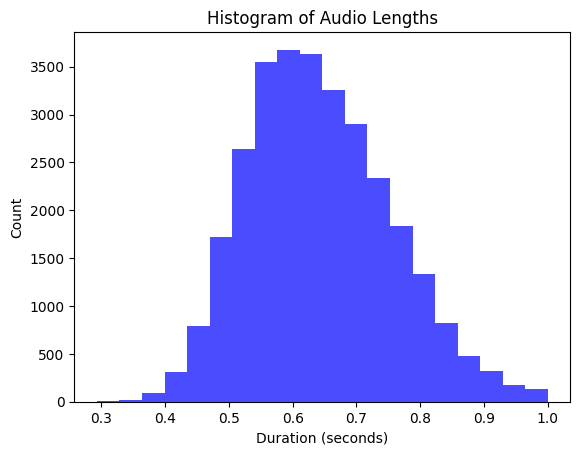

In [ ]:
import pandas as pd
import librosa
import matplotlib.pyplot as plt

# Sample rate for librosa
sr = 16000

# Initialize lists to store audio lengths, features, and labels
audio_lengths = []

# Assuming df is your DataFrame containing 'Audio Path' and 'label' columns
for idx, row in df.iterrows():
    audio_path = row['Audio Path']
    try:
        # Load audio file
        y, sr = librosa.load(audio_path, sr=sr)

        # Compute duration
        duration = librosa.get_duration(y=y, sr=sr)
        audio_lengths.append(duration)
    except Exception as e:
        print(f"Error processing {audio_path}: {e}")



# Plot histogram of audio lengths
plt.hist(audio_lengths, bins=20, color='blue', alpha=0.7)
plt.title('Histogram of Audio Lengths')
plt.xlabel('Duration (seconds)')
plt.ylabel('Count')
plt.show()



# First Features

## Step 1 & 2 (Feature Extraction)

In [ ]:
import numpy as np
import librosa
from sklearn.preprocessing import normalize

def preprocess(X, Y):
    X_preprocessed = []
    target_length = 8000  # Target length for padding

    for i, (filepath, label) in enumerate(zip(X, Y)):
        try:
            # Load the audio file
            y_audio, fs = librosa.load(filepath, sr=8000)
            y_audio, _ = librosa.effects.trim(y_audio)  # Remove leading and trailing silence
            #y_audio = normalize(y_audio.reshape(-1, 1))  # Normalizing the audio signal
            data=librosa.util.pad_center(y_audio, size=8000)
            X_preprocessed.append(np.array(data))

        except Exception as e:
            print(f"Error processing {filepath}: {e}")

    return np.array(X_preprocessed), np.array(Y)

def feature_extractor(X, Y):
    features = []
    sample_rate = 8000
    frame_length = 0.025  # 25 milliseconds
    hop_length = 0.0125  # 12.5 milliseconds, typically half of frame length
    n_mfcc = 12
    n_mels = 24
    Y_lable=[]
    for i, (audio_data, label) in enumerate(zip(X, Y)):
        try:
            # Calculate number of samples in a frame and hop
            n_fft = int(sample_rate * frame_length)
            hop_length_samples = int(sample_rate * hop_length)

            # Compute MFCC features
            mfcc = librosa.feature.mfcc(y=audio_data, sr=sample_rate, n_mfcc=n_mfcc, n_mels=n_mels, n_fft=n_fft, hop_length=hop_length_samples)
            mfccs_processed = np.mean(mfcc.T, axis=0)  # take mean of MFCCs along the time axis

            delta1_mfcc = librosa.feature.delta(mfcc, order=1)
            delta1_mfcc_processed = np.mean(delta1_mfcc.T, axis=0)

            delta2_mfcc = librosa.feature.delta(mfcc, order=2)
            delta2_mfcc_processed = np.mean(delta2_mfcc.T, axis=0)

            mfcc_features = np.concatenate((mfccs_processed, delta1_mfcc_processed, delta2_mfcc_processed), axis=0)
            features.append(np.array(mfcc_features))
            Y_lable.append(label)
        except Exception as e:
            print(f"Error extracting features from audio data at index {i}: {e}")

    return np.array(features), np.array(Y_lable)


In [ ]:

X = df['Audio Path'].tolist()
Y=df["label"].tolist()
X_preprocessed,Y_preprocessed = preprocess(X,Y)
features,Y=feature_extractor(X_preprocessed,Y_preprocessed)
print(features.shape,Y.shape)

(30000, 36) (30000,)


In [ ]:
import numpy as np

def train_test_split1(X, y, test_size=0.25, random_state=None):

    # Convert inputs to numpy arrays
    X = np.array(X)
    y = np.array(y)

    # Ensure consistent random state
    if random_state is not None:
        np.random.seed(random_state)

    # Shuffle the indices
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)

    # Determine the size of the test set
    if isinstance(test_size, float):
        test_size = int(test_size * X.shape[0])
    elif isinstance(test_size, int):
        test_size = test_size
    else:
        raise ValueError("test_size should be a float or an int")

    # Split the indices for training and testing
    test_indices = indices[:test_size]
    train_indices = indices[test_size:]

    # Split the data
    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]

    return X_train, X_test, y_train, y_test



In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

# Assuming X and Y are defined as feature and label datasets
# Split dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(features, Y, test_size=0.2, random_state=42)

# Output the results
print("X_train:", len(X_train))
print("X_test:", len(X_test))
print("Y_train:", len(Y_train))
print("Y_test:", len(Y_test))


X_train: 24000
X_test: 6000
Y_train: 24000
Y_test: 6000


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)
Y_train = encoder.fit_transform(Y_train.reshape(-1, 1))
Y_test = encoder.transform(Y_test.reshape(-1, 1))

## Step 3

### MLP Class

In [78]:
import numpy as np
from tqdm import tqdm

class MLP:
    def __init__(self, input_size, hidden_sizes, output_size, activations):
        self.input_size = input_size
        self.hidden_sizes = hidden_sizes
        self.output_size = output_size
        self.num_layers = len(hidden_sizes) + 1
        self.activations = activations

        # Initialize weights and biases for all layers
        self.weights = [np.random.randn(input_size, hidden_sizes[0]) * 0.01]
        self.biases = [np.zeros((1, hidden_sizes[0]))]
        for i in range(1, len(hidden_sizes)):
            self.weights.append(np.random.randn(hidden_sizes[i-1], hidden_sizes[i]) * 0.01)
            self.biases.append(np.zeros((1, hidden_sizes[i])))
        self.weights.append(np.random.randn(hidden_sizes[-1], output_size) * 0.01)
        self.biases.append(np.zeros((1, output_size)))

        # Add history to track loss and accuracy
        self.loss_history = []
        self.train_accuracy_history = []
        self.val_loss_history = []
        self.val_accuracy_history = []

    def relu(self, z):
        return np.maximum(0, z)

    def relu_derivative(self, z):
        return np.where(z > 0, 1, 0)

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def sigmoid_derivative(self, z):
        return self.sigmoid(z) * (1 - self.sigmoid(z))

    def bipolar_sigmoid(self, x):
        return (1 - np.exp(-x)) / (1 + np.exp(-x))

    def bipolar_sigmoid_derivative(self, x):
        return 0.5 * (1 - self.bipolar_sigmoid(x) ** 2)

    def softmax(self, z):
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)

    def activation_forward(self, z, activation):
        if activation == 'relu':
            return self.relu(z)
        elif activation == 'sigmoid':
            return self.sigmoid(z)
        elif activation == 'bipolar_sigmoid':
            return self.bipolar_sigmoid(z)
        elif activation == 'softmax':
            return self.softmax(z)
        else:
            raise ValueError(f"Unsupported activation function: {activation}")

    def activation_backward(self, z, activation):
        if activation == 'relu':
            return self.relu_derivative(z)
        elif activation == 'sigmoid':
            return self.sigmoid_derivative(z)
        elif activation == 'bipolar_sigmoid':
            return self.bipolar_sigmoid_derivative(z)
        else:
            raise ValueError(f"Unsupported activation function: {activation}")

    def forward(self, X):
        self.z = [None] * self.num_layers
        self.a = [None] * self.num_layers

        # Forward pass through each layer
        self.z[0] = np.dot(X, self.weights[0]) + self.biases[0]
        self.a[0] = self.activation_forward(self.z[0], self.activations[0])
        for i in range(1, self.num_layers - 1):
            self.z[i] = np.dot(self.a[i-1], self.weights[i]) + self.biases[i]
            self.a[i] = self.activation_forward(self.z[i], self.activations[i])
        self.z[-1] = np.dot(self.a[-2], self.weights[-1]) + self.biases[-1]
        self.a[-1] = self.softmax(self.z[-1])

        return self.a[-1]

    def compute_loss(self, Y, output):
        return np.mean((Y - output) ** 2)

    def backward(self, X, Y, output):
        m = X.shape[0]
        deltas = [None] * self.num_layers
        dWs = [None] * self.num_layers
        dbs = [None] * self.num_layers

        # Compute delta for the output layer
        deltas[-1] = output - Y
        deltas[-1] /= m

        # Backpropagate errors through the network
        for i in range(self.num_layers - 1, 0, -1):
            dWs[i] = np.dot(self.a[i-1].T, deltas[i])
            dbs[i] = np.sum(deltas[i], axis=0, keepdims=True)
            deltas[i-1] = np.dot(deltas[i], self.weights[i].T) * self.activation_backward(self.z[i-1], self.activations[i-1])

        dWs[0] = np.dot(X.T, deltas[0])
        dbs[0] = np.sum(deltas[0], axis=0, keepdims=True)

        return dWs, dbs

    def update_parameters(self, dWs, dbs, learning_rate):
        for i in range(self.num_layers):
            self.weights[i] -= learning_rate * dWs[i]
            self.biases[i] -= learning_rate * dbs[i]

    def train(self, X, Y, validation_split=0.2, epochs=1000, learning_rate=0.01, batch_size=32):
        # Split data into training and validation sets
        num_samples = X.shape[0]
        num_validation_samples = int(validation_split * num_samples)
        indices = np.random.permutation(num_samples)
        training_idx, val_idx = indices[num_validation_samples:], indices[:num_validation_samples]
        X_train, X_val = X[training_idx], X[val_idx]
        Y_train, Y_val = Y[training_idx], Y[val_idx]

        best_val_accuracy = 0.0
        best_params = None

        # Determine the number of batches
        num_batches = int(np.ceil(X_train.shape[0] / batch_size))

        for epoch in range(epochs):
            # Shuffle training data at the beginning of each epoch
            permutation = np.random.permutation(X_train.shape[0])
            X_train_shuffled = X_train[permutation]
            Y_train_shuffled = Y_train[permutation]

            batch_accuracies = []
            batch_losses = []

            with tqdm(total=num_batches, desc=f"Epoch {epoch+1}/{epochs}") as pbar:
                for batch in range(num_batches):
                    # Create mini-batches
                    start = batch * batch_size
                    end = min(start + batch_size, X_train.shape[0])
                    X_batch = X_train_shuffled[start:end]
                    Y_batch = Y_train_shuffled[start:end]

                    # Forward pass
                    output = self.forward(X_batch)

                    # Compute loss and gradients
                    loss = self.compute_loss(Y_batch, output)
                    dWs, dbs = self.backward(X_batch, Y_batch, output)

                    # Update parameters
                    self.update_parameters(dWs, dbs, learning_rate)

                    # Evaluate batch accuracy
                    _, batch_accuracy = self.evaluate(X_batch, Y_batch)
                    batch_accuracies.append(batch_accuracy)
                    batch_losses.append(loss)

                    pbar.update(1)

                # Compute average batch accuracy and loss for the epoch
                avg_batch_accuracy = np.mean(batch_accuracies)
                avg_batch_loss = np.mean(batch_losses)
                self.train_accuracy_history.append(avg_batch_accuracy)
                self.loss_history.append(avg_batch_loss)

                # Evaluate on validation data
                val_output = self.forward(X_val)
                val_loss = self.compute_loss(Y_val, val_output)
                _, val_accuracy = self.evaluate(X_val, Y_val)

                self.val_loss_history.append(val_loss)
                self.val_accuracy_history.append(val_accuracy)

                # Save best parameters
                if val_accuracy > best_val_accuracy:
                    best_val_accuracy = val_accuracy
                    best_params = {
                        'weights': [W.copy() for W in self.weights],
                        'biases': [b.copy() for b in self.biases]
                    }

                pbar.set_postfix({
                    'train_loss': avg_batch_loss,
                    'train_accuracy': avg_batch_accuracy,
                    'val_loss': val_loss,
                    'val_accuracy': val_accuracy
                })

        if best_params is not None:
            self.weights = best_params['weights']
            self.biases = best_params['biases']

        history = {
            'loss': self.loss_history,
            'accuracy': self.train_accuracy_history,
            'val_loss': self.val_loss_history,
            'val_accuracy': self.val_accuracy_history
        }

        return history

    def predict(self, X):
        output = self.forward(X)
        return np.argmax(output, axis=1)

    def evaluate(self, X, Y):
        output = self.forward(X)
        loss = self.compute_loss(Y, output)
        accuracy = np.mean(np.argmax(output, axis=1) == np.argmax(Y, axis=1))
        return loss, accuracy


### 1 Layer Sigmoid (H=23)

In [79]:
num_features = X_train.shape[1]
num_classes = 10
hidden_sizes = [int((num_features + num_classes) / 2)]
activations = ['bipolar_sigmoid', 'softmax']

mlp = MLP(input_size=num_features, hidden_sizes=hidden_sizes, output_size=num_classes,activations=activations)
history = mlp.train(X_train, Y_train, validation_split=0.2, epochs=500, learning_rate=0.001)
predictions = mlp.predict(X_test)

Epoch 500/500: 100%|██████████| 600/600 [00:00<00:00, 1427.49it/s, train_loss=0.0382, train_accuracy=0.792, val_loss=0.0354, val_accuracy=0.751]


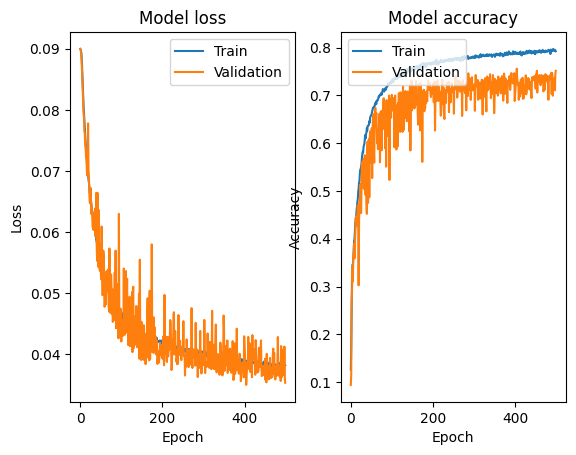

In [80]:
# Plot training & validation loss values
plt.subplot(1, 2, 1)
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [81]:
loss,accuracy = mlp.evaluate(X_test,Y_test)
print(loss,accuracy)

0.03469217445004936 0.7546666666666667


In [82]:
from sklearn.metrics import classification_report

# Assuming you have already calculated Y_pred using your MLP model
Y_pred = mlp.predict(X_test)

# Generate classification report
report = classification_report(np.argmax(Y_test, axis=1), Y_pred)

print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.74      0.76       629
           1       0.64      0.76      0.70       573
           2       0.71      0.76      0.74       619
           3       0.75      0.68      0.71       619
           4       0.84      0.93      0.89       585
           5       0.84      0.81      0.82       594
           6       0.86      0.78      0.82       629
           7       0.71      0.72      0.72       594
           8       0.71      0.82      0.76       581
           9       0.70      0.55      0.62       577

    accuracy                           0.75      6000
   macro avg       0.76      0.75      0.75      6000
weighted avg       0.76      0.75      0.75      6000



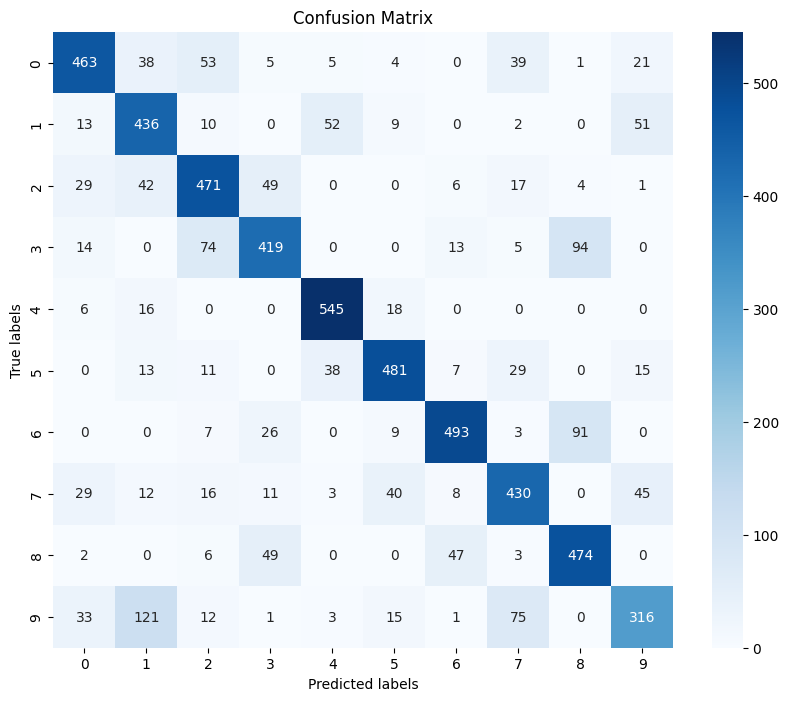

In [83]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already calculated Y_pred using your MLP model
Y_pred = mlp.predict(X_test)

# Calculate confusion matrix
cm = confusion_matrix(np.argmax(Y_test, axis=1), Y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


### 2  Layer Sigmoid (H1=23, H2=23)

In [84]:
num_features = X_train.shape[1]
num_classes = 10
hidden_sizes = [int((num_features + num_classes) / 2),23]
activations = ['bipolar_sigmoid','bipolar_sigmoid', 'softmax']

mlp = MLP(input_size=num_features, hidden_sizes=hidden_sizes, output_size=num_classes,activations=activations)
history = mlp.train(X_train, Y_train, validation_split=0.2, epochs=500, learning_rate=0.001)
predictions = mlp.predict(X_test)

Epoch 500/500: 100%|██████████| 600/600 [00:00<00:00, 929.50it/s, train_loss=0.0439, train_accuracy=0.743, val_loss=0.052, val_accuracy=0.621] 


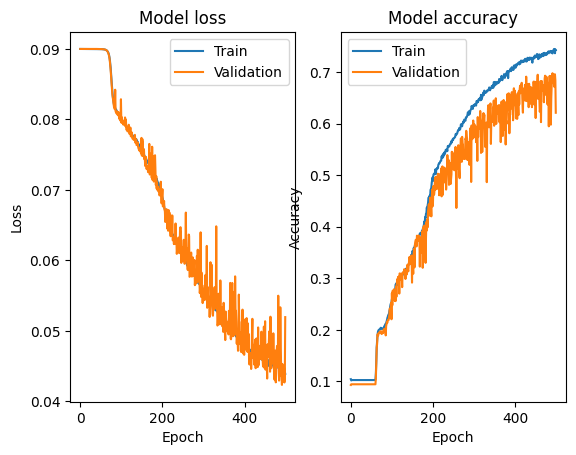

In [85]:
# Plot training & validation loss values
plt.subplot(1, 2, 1)
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [86]:
loss,accuracy = mlp.evaluate(X_test,Y_test)
print(loss,accuracy)

0.04162642669354537 0.7011666666666667


In [87]:
from sklearn.metrics import classification_report

# Assuming you have already calculated Y_pred using your MLP model
Y_pred = mlp.predict(X_test)

# Generate classification report
report = classification_report(np.argmax(Y_test, axis=1), Y_pred)

print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.56      0.64       629
           1       0.57      0.77      0.66       573
           2       0.57      0.77      0.66       619
           3       0.64      0.76      0.70       619
           4       0.86      0.91      0.88       585
           5       0.85      0.77      0.81       594
           6       0.79      0.82      0.80       629
           7       0.72      0.61      0.66       594
           8       0.73      0.67      0.70       581
           9       0.61      0.37      0.46       577

    accuracy                           0.70      6000
   macro avg       0.71      0.70      0.70      6000
weighted avg       0.71      0.70      0.70      6000



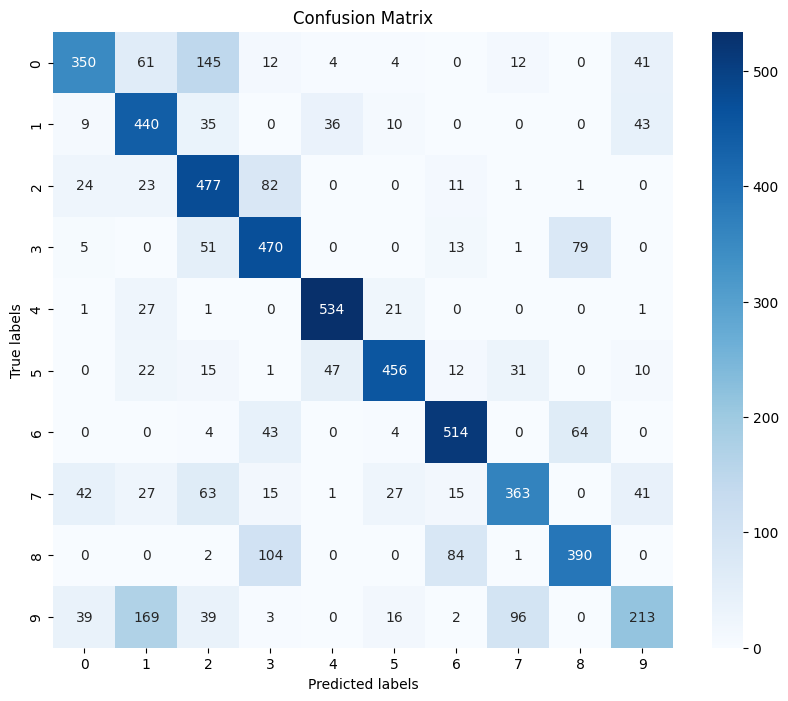

In [88]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already calculated Y_pred using your MLP model
Y_pred = mlp.predict(X_test)

# Calculate confusion matrix
cm = confusion_matrix(np.argmax(Y_test, axis=1), Y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


### 2  Layer Sigmoid (H1=24, H2=18)

In [89]:
num_features = X_train.shape[1]
num_classes = 10
hidden_sizes = [int(num_features *2 / 3),int(num_features / 2)]
activations = ['bipolar_sigmoid','bipolar_sigmoid', 'softmax']

mlp = MLP(input_size=num_features, hidden_sizes=hidden_sizes, output_size=num_classes,activations=activations)
history = mlp.train(X_train, Y_train, validation_split=0.2, epochs=500, learning_rate=0.001)
predictions = mlp.predict(X_test)

Epoch 500/500: 100%|██████████| 600/600 [00:00<00:00, 1572.19it/s, train_loss=0.0432, train_accuracy=0.751, val_loss=0.0407, val_accuracy=0.709]


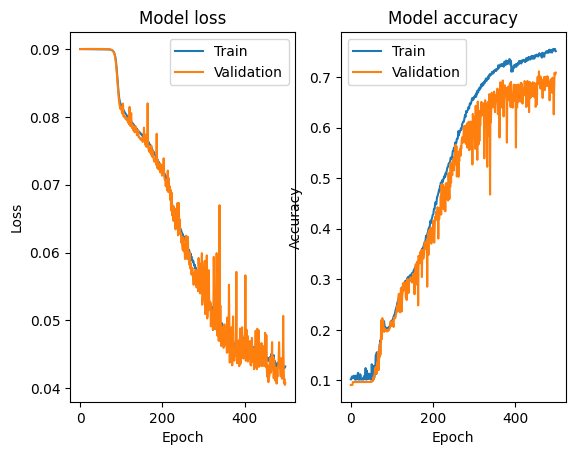

In [90]:
# Plot training & validation loss values
plt.subplot(1, 2, 1)
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [91]:
loss,accuracy = mlp.evaluate(X_test,Y_test)
print(loss,accuracy)

0.04061823132887496 0.7171666666666666


In [92]:
from sklearn.metrics import classification_report

# Assuming you have already calculated Y_pred using your MLP model
Y_pred = mlp.predict(X_test)

# Generate classification report
report = classification_report(np.argmax(Y_test, axis=1), Y_pred)

print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.69      0.68       629
           1       0.60      0.71      0.65       573
           2       0.62      0.75      0.68       619
           3       0.70      0.67      0.68       619
           4       0.87      0.92      0.89       585
           5       0.89      0.74      0.81       594
           6       0.92      0.74      0.82       629
           7       0.73      0.65      0.69       594
           8       0.71      0.78      0.75       581
           9       0.54      0.52      0.53       577

    accuracy                           0.72      6000
   macro avg       0.73      0.72      0.72      6000
weighted avg       0.73      0.72      0.72      6000



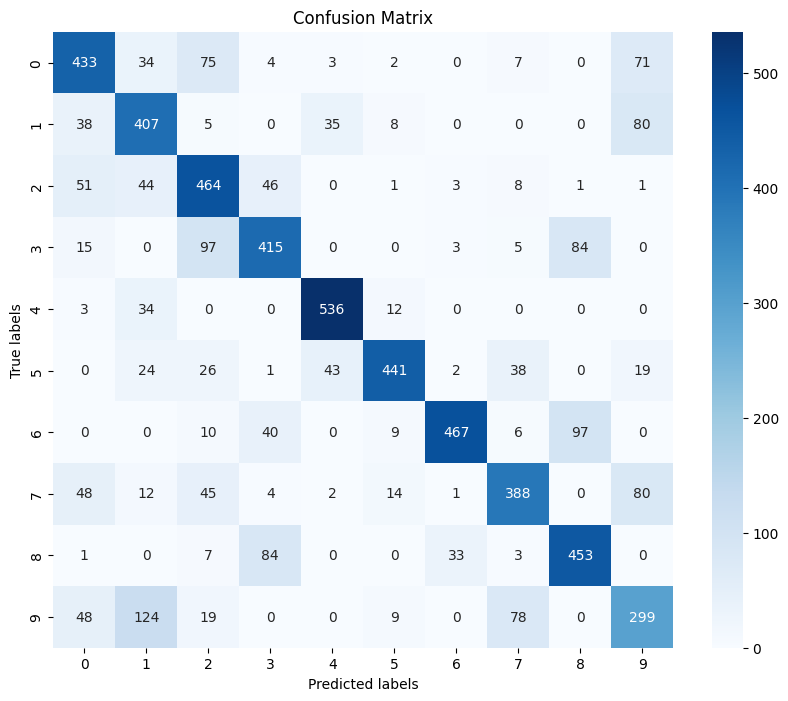

In [93]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already calculated Y_pred using your MLP model
Y_pred = mlp.predict(X_test)

# Calculate confusion matrix
cm = confusion_matrix(np.argmax(Y_test, axis=1), Y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


### 2  Layer Sigmoid (H1=18, H2=12)

In [94]:
num_features = X_train.shape[1]
num_classes = 10
hidden_sizes = [int(num_features / 2),int(num_features  / 3)]
activations = ['bipolar_sigmoid','bipolar_sigmoid', 'softmax']

mlp = MLP(input_size=num_features, hidden_sizes=hidden_sizes, output_size=num_classes,activations=activations)
history = mlp.train(X_train, Y_train, validation_split=0.2, epochs=500, learning_rate=0.001)
predictions = mlp.predict(X_test)

Epoch 500/500: 100%|██████████| 600/600 [00:00<00:00, 1717.99it/s, train_loss=0.0466, train_accuracy=0.722, val_loss=0.0446, val_accuracy=0.688]


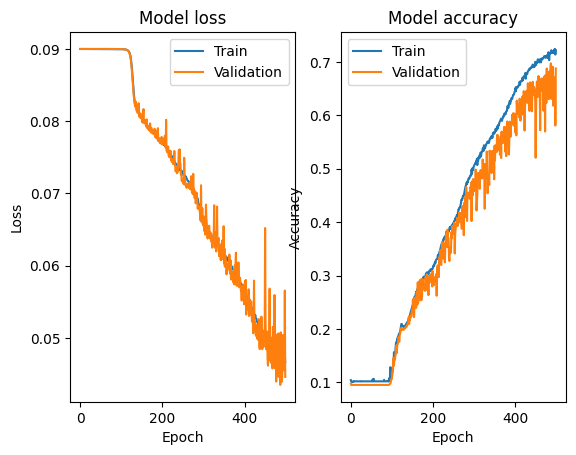

In [95]:
# Plot training & validation loss values
plt.subplot(1, 2, 1)
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [96]:
loss,accuracy = mlp.evaluate(X_test,Y_test)
print(loss,accuracy)

0.04352354084605023 0.6991666666666667


In [97]:
from sklearn.metrics import classification_report

# Assuming you have already calculated Y_pred using your MLP model
Y_pred = mlp.predict(X_test)

# Generate classification report
report = classification_report(np.argmax(Y_test, axis=1), Y_pred)

print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.71      0.66       629
           1       0.63      0.68      0.66       573
           2       0.63      0.71      0.67       619
           3       0.68      0.69      0.68       619
           4       0.91      0.87      0.89       585
           5       0.81      0.82      0.81       594
           6       0.74      0.83      0.78       629
           7       0.65      0.63      0.64       594
           8       0.73      0.61      0.67       581
           9       0.59      0.43      0.50       577

    accuracy                           0.70      6000
   macro avg       0.70      0.70      0.70      6000
weighted avg       0.70      0.70      0.70      6000



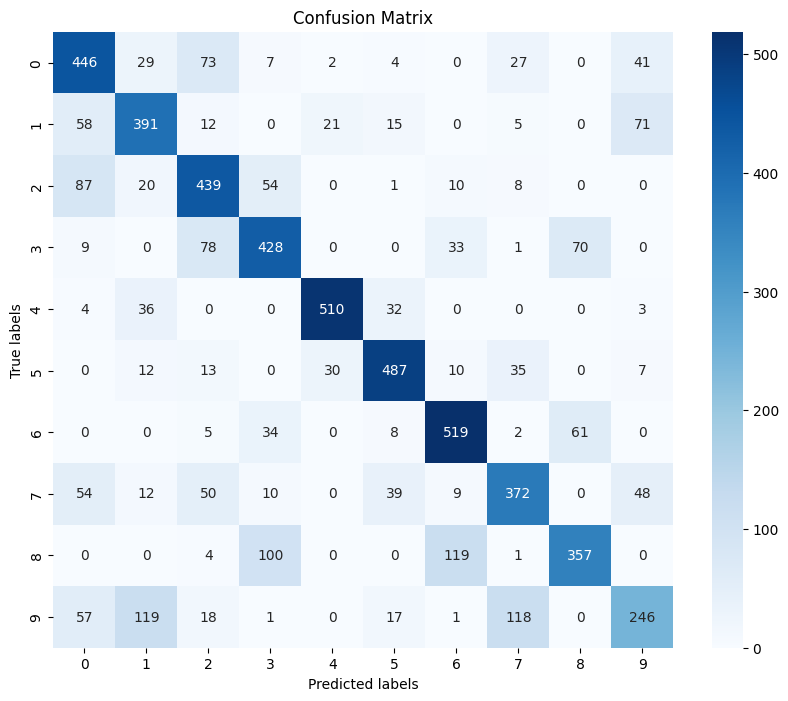

In [98]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already calculated Y_pred using your MLP model
Y_pred = mlp.predict(X_test)

# Calculate confusion matrix
cm = confusion_matrix(np.argmax(Y_test, axis=1), Y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


### 1 Layer ReLu (H=23)

In [99]:
num_features = X_train.shape[1]
num_classes = 10
hidden_sizes = [int((num_features + num_classes) / 2)]
activations = ['relu', 'softmax']

mlp = MLP(input_size=num_features, hidden_sizes=hidden_sizes, output_size=num_classes,activations=activations)
history = mlp.train(X_train, Y_train, validation_split=0.2, epochs=500, learning_rate=0.001)
predictions = mlp.predict(X_test)

Epoch 500/500: 100%|██████████| 600/600 [00:00<00:00, 2478.25it/s, train_loss=0.045, train_accuracy=0.718, val_loss=0.0447, val_accuracy=0.672]


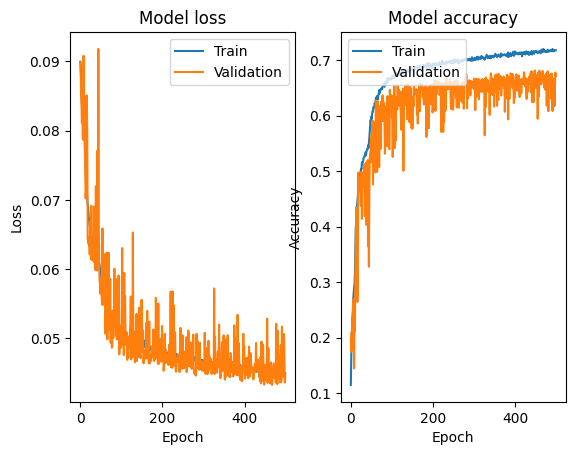

In [100]:
# Plot training & validation loss values
plt.subplot(1, 2, 1)
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [101]:
loss,accuracy = mlp.evaluate(X_test,Y_test)
print(loss,accuracy)

0.04235123457901162 0.6931666666666667


In [102]:
from sklearn.metrics import classification_report

# Assuming you have already calculated Y_pred using your MLP model
Y_pred = mlp.predict(X_test)

# Generate classification report
report = classification_report(np.argmax(Y_test, axis=1), Y_pred)

print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.62      0.65       629
           1       0.58      0.70      0.64       573
           2       0.62      0.69      0.65       619
           3       0.59      0.78      0.67       619
           4       0.92      0.85      0.88       585
           5       0.82      0.84      0.83       594
           6       0.81      0.74      0.78       629
           7       0.65      0.63      0.64       594
           8       0.69      0.62      0.65       581
           9       0.64      0.45      0.53       577

    accuracy                           0.69      6000
   macro avg       0.70      0.69      0.69      6000
weighted avg       0.70      0.69      0.69      6000



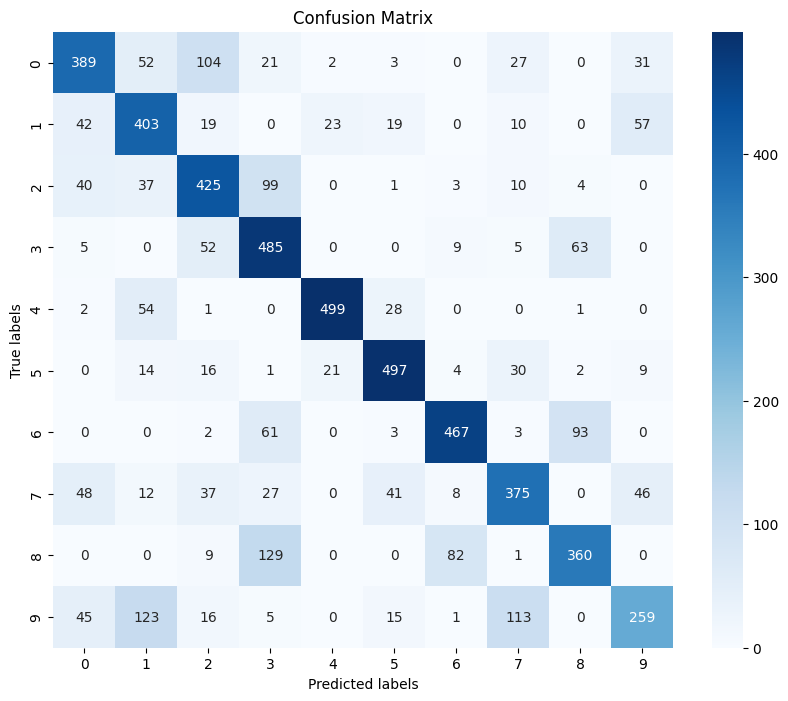

In [103]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already calculated Y_pred using your MLP model
Y_pred = mlp.predict(X_test)

# Calculate confusion matrix
cm = confusion_matrix(np.argmax(Y_test, axis=1), Y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


### 2  Layer ReLu (H1=23, H2=23)

In [104]:
num_features = X_train.shape[1]
num_classes = 10
hidden_sizes = [int((num_features + num_classes) / 2),23]
activations = ['relu','relu', 'softmax']

mlp = MLP(input_size=num_features, hidden_sizes=hidden_sizes, output_size=num_classes,activations=activations)
history = mlp.train(X_train, Y_train, validation_split=0.2, epochs=500, learning_rate=0.001)
predictions = mlp.predict(X_test)

Epoch 500/500: 100%|██████████| 600/600 [00:00<00:00, 2060.01it/s, train_loss=0.0333, train_accuracy=0.821, val_loss=0.0324, val_accuracy=0.765]


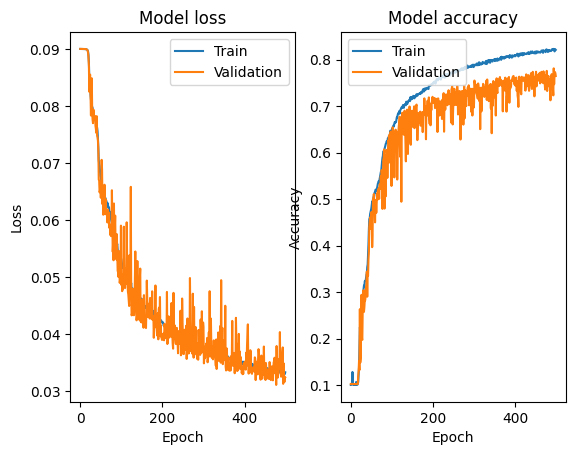

In [105]:
# Plot training & validation loss values
plt.subplot(1, 2, 1)
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [106]:
loss,accuracy = mlp.evaluate(X_test,Y_test)
print(loss,accuracy)

0.031043766585942673 0.7778333333333334


In [107]:
from sklearn.metrics import classification_report

# Assuming you have already calculated Y_pred using your MLP model
Y_pred = mlp.predict(X_test)

# Generate classification report
report = classification_report(np.argmax(Y_test, axis=1), Y_pred)

print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.68      0.75       629
           1       0.69      0.76      0.73       573
           2       0.78      0.75      0.77       619
           3       0.72      0.72      0.72       619
           4       0.87      0.96      0.91       585
           5       0.90      0.81      0.85       594
           6       0.90      0.79      0.84       629
           7       0.77      0.78      0.77       594
           8       0.72      0.81      0.76       581
           9       0.63      0.72      0.67       577

    accuracy                           0.78      6000
   macro avg       0.78      0.78      0.78      6000
weighted avg       0.78      0.78      0.78      6000



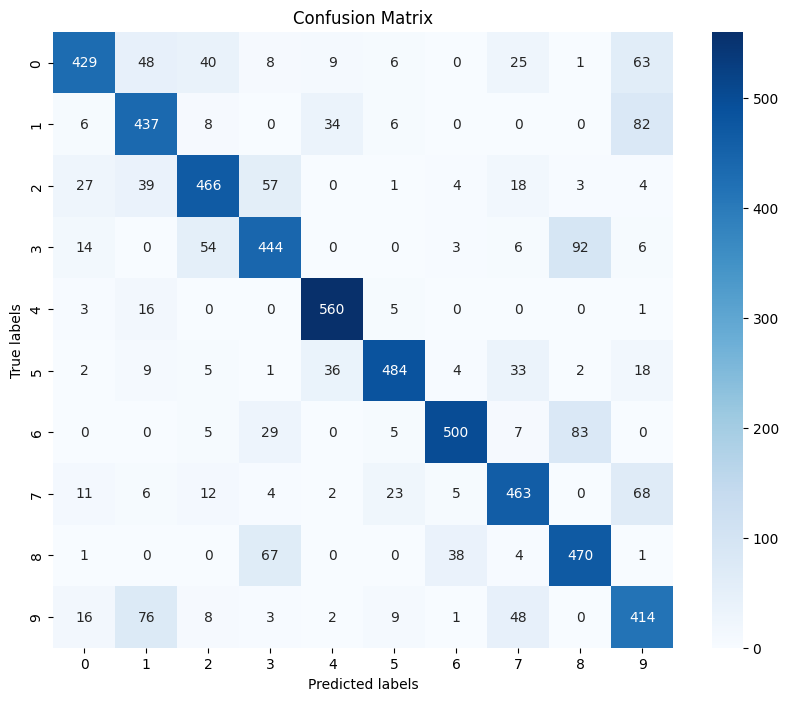

In [108]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already calculated Y_pred using your MLP model
Y_pred = mlp.predict(X_test)

# Calculate confusion matrix
cm = confusion_matrix(np.argmax(Y_test, axis=1), Y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


### 2  Layer ReLu (H1=24, H2=18)

In [109]:
num_features = X_train.shape[1]
num_classes = 10
hidden_sizes = [int(num_features *2 / 3),int(num_features / 2)]
activations = ['relu','relu', 'softmax']

mlp = MLP(input_size=num_features, hidden_sizes=hidden_sizes, output_size=num_classes,activations=activations)
history = mlp.train(X_train, Y_train, validation_split=0.2, epochs=500, learning_rate=0.01)
predictions = mlp.predict(X_test)

Epoch 500/500: 100%|██████████| 600/600 [00:00<00:00, 2020.54it/s, train_loss=0.0386, train_accuracy=0.809, val_loss=0.0381, val_accuracy=0.728]


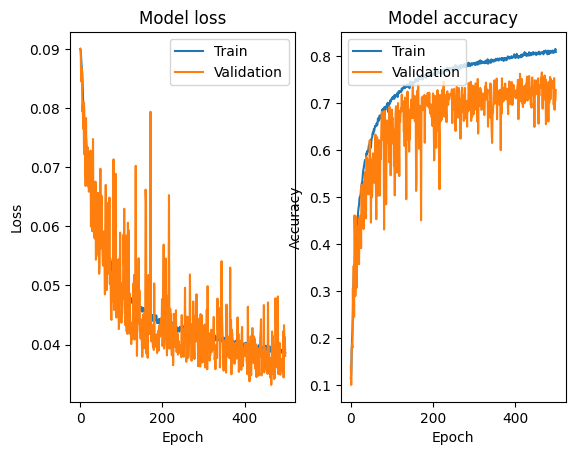

In [110]:
# Plot training & validation loss values
plt.subplot(1, 2, 1)
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [111]:
loss,accuracy = mlp.evaluate(X_test,Y_test)
print(loss,accuracy)

0.034090990027617785 0.755


In [112]:
from sklearn.metrics import classification_report

# Assuming you have already calculated Y_pred using your MLP model
Y_pred = mlp.predict(X_test)

# Generate classification report
report = classification_report(np.argmax(Y_test, axis=1), Y_pred)

print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.83      0.76       629
           1       0.68      0.77      0.72       573
           2       0.81      0.63      0.71       619
           3       0.69      0.69      0.69       619
           4       0.93      0.89      0.91       585
           5       0.86      0.80      0.83       594
           6       0.84      0.79      0.81       629
           7       0.71      0.81      0.76       594
           8       0.67      0.85      0.75       581
           9       0.74      0.49      0.59       577

    accuracy                           0.76      6000
   macro avg       0.76      0.75      0.75      6000
weighted avg       0.76      0.76      0.75      6000



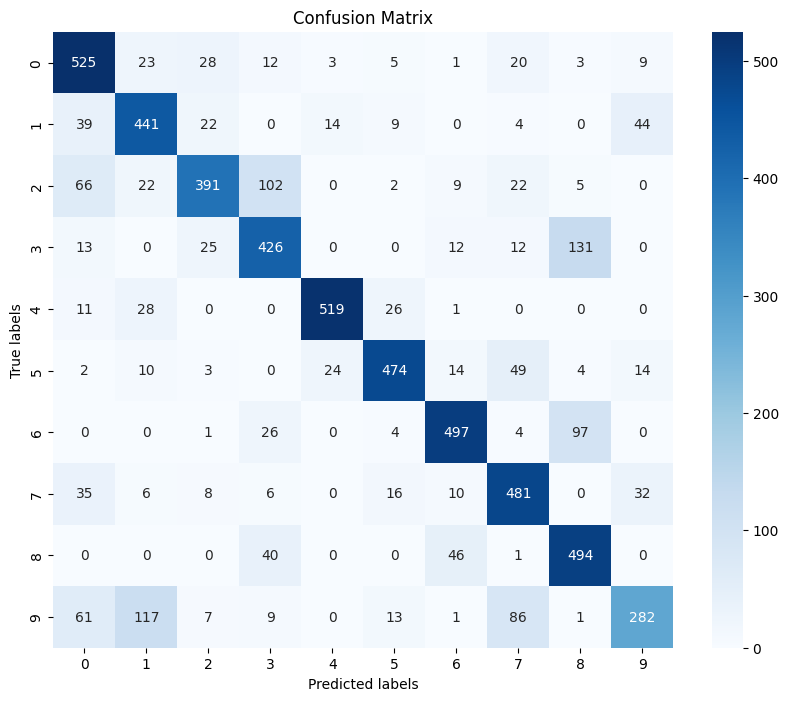

In [113]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already calculated Y_pred using your MLP model
Y_pred = mlp.predict(X_test)

# Calculate confusion matrix
cm = confusion_matrix(np.argmax(Y_test, axis=1), Y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


### 2  Layer ReLu (H1=18, H2=12)

In [114]:
num_features = X_train.shape[1]
num_classes = 10
hidden_sizes = [int(num_features / 2),int(num_features  / 3)]
activations = ['relu','relu', 'softmax']

mlp = MLP(input_size=num_features, hidden_sizes=hidden_sizes, output_size=num_classes,activations=activations)
history = mlp.train(X_train, Y_train, validation_split=0.2, epochs=500, learning_rate=0.001)
predictions = mlp.predict(X_test)

Epoch 500/500: 100%|██████████| 600/600 [00:00<00:00, 2121.07it/s, train_loss=0.0366, train_accuracy=0.789, val_loss=0.034, val_accuracy=0.764]


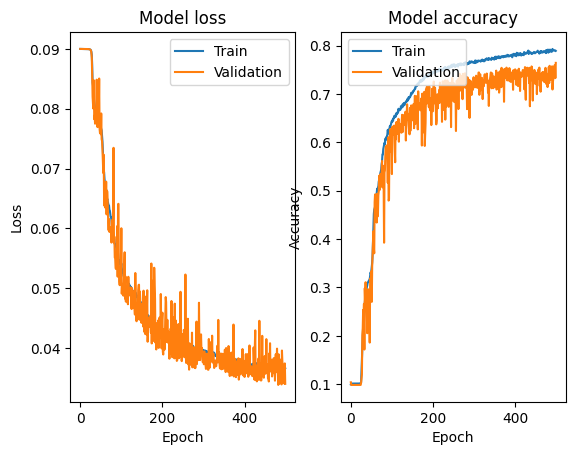

In [115]:
# Plot training & validation loss values
plt.subplot(1, 2, 1)
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [116]:
loss,accuracy = mlp.evaluate(X_test,Y_test)
print(loss,accuracy)

0.03374479448525939 0.7568333333333334


In [117]:
from sklearn.metrics import classification_report

# Assuming you have already calculated Y_pred using your MLP model
Y_pred = mlp.predict(X_test)

# Generate classification report
report = classification_report(np.argmax(Y_test, axis=1), Y_pred)

print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.79      0.75       629
           1       0.68      0.73      0.70       573
           2       0.74      0.74      0.74       619
           3       0.66      0.73      0.70       619
           4       0.86      0.95      0.90       585
           5       0.88      0.81      0.84       594
           6       0.91      0.72      0.81       629
           7       0.81      0.70      0.75       594
           8       0.71      0.77      0.74       581
           9       0.66      0.64      0.65       577

    accuracy                           0.76      6000
   macro avg       0.76      0.76      0.76      6000
weighted avg       0.76      0.76      0.76      6000



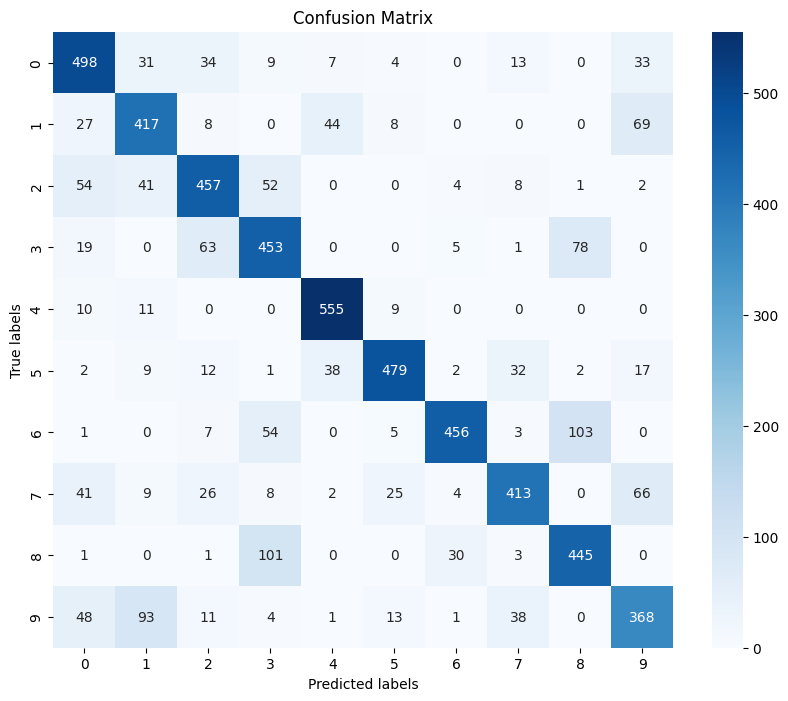

In [118]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already calculated Y_pred using your MLP model
Y_pred = mlp.predict(X_test)

# Calculate confusion matrix
cm = confusion_matrix(np.argmax(Y_test, axis=1), Y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


# Second Features

## Step 1 & 2 (Feature Extraction)

In [126]:
import numpy as np
import librosa
from sklearn.preprocessing import normalize

def preprocess(X, Y):
    X_preprocessed = []
    target_length = 8000  # Target length for padding

    for i, (filepath, label) in enumerate(zip(X, Y)):
        try:
            # Load the audio file
            y_audio, fs = librosa.load(filepath, sr=8000)
            y_audio, _ = librosa.effects.trim(y_audio)  # Remove leading and trailing silence
            #y_audio = normalize(y_audio.reshape(-1, 1))  # Normalizing the audio signal
            data=librosa.util.pad_center(y_audio, size=8000)
            X_preprocessed.append(np.array(data))

        except Exception as e:
            print(f"Error processing {filepath}: {e}")

    return np.array(X_preprocessed), np.array(Y)

def feature_extractor(X, Y):
    features = []
    sample_rate = 8000
    frame_length = 0.025  # 25 milliseconds
    hop_length = 0.0125  # 12.5 milliseconds, typically half of frame length
    n_mfcc = 12
    n_mels = 24
    Y_lable=[]
    for i, (audio_data, label) in enumerate(zip(X, Y)):
        try:
            # Calculate number of samples in a frame and hop
            n_fft = int(sample_rate * frame_length)
            hop_length_samples = int(sample_rate * hop_length)

            # Compute MFCC features
            mfcc = librosa.feature.mfcc(y=audio_data, sr=sample_rate, n_mfcc=n_mfcc, n_mels=n_mels, n_fft=n_fft, hop_length=hop_length_samples)

            delta1_mfcc = librosa.feature.delta(mfcc, order=1)

            delta2_mfcc = librosa.feature.delta(mfcc, order=2)

            mfcc_features = np.concatenate((mfcc, delta1_mfcc, delta2_mfcc), axis=0)
            features.append(np.array(mfcc_features))
            Y_lable.append(label)
        except Exception as e:
            print(f"Error extracting features from audio data at index {i}: {e}")

    return np.array(features), np.array(Y_lable)


In [127]:

X = df['Audio Path'].tolist()
Y=df["label"].tolist()
X_preprocessed,Y_preprocessed = preprocess(X,Y)
features,Y=feature_extractor(X_preprocessed,Y_preprocessed)
print(features.shape,Y.shape)

(30000, 36, 81) (30000,)


In [128]:
features = features.reshape(30000, -1)
print(features.shape)

(30000, 2916)


In [129]:
import numpy as np
from sklearn.model_selection import train_test_split

# Assuming X and Y are defined as feature and label datasets
# Split dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(features, Y, test_size=0.2, random_state=42)

# Output the results
print("X_train:", len(X_train))
print("X_test:", len(X_test))
print("Y_train:", len(Y_train))
print("Y_test:", len(Y_test))


X_train: 24000
X_test: 6000
Y_train: 24000
Y_test: 6000


In [130]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [131]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)
Y_train = encoder.fit_transform(Y_train.reshape(-1, 1))
Y_test = encoder.transform(Y_test.reshape(-1, 1))

## Step 3

### MLP Class

In [132]:
import numpy as np
from tqdm import tqdm

class MLP:
    def __init__(self, input_size, hidden_sizes, output_size, activations):
        self.input_size = input_size
        self.hidden_sizes = hidden_sizes
        self.output_size = output_size
        self.num_layers = len(hidden_sizes) + 1
        self.activations = activations

        # Initialize weights and biases for all layers
        self.weights = [np.random.randn(input_size, hidden_sizes[0]) * 0.01]
        self.biases = [np.zeros((1, hidden_sizes[0]))]
        for i in range(1, len(hidden_sizes)):
            self.weights.append(np.random.randn(hidden_sizes[i-1], hidden_sizes[i]) * 0.01)
            self.biases.append(np.zeros((1, hidden_sizes[i])))
        self.weights.append(np.random.randn(hidden_sizes[-1], output_size) * 0.01)
        self.biases.append(np.zeros((1, output_size)))

        # Add history to track loss and accuracy
        self.loss_history = []
        self.train_accuracy_history = []
        self.val_loss_history = []
        self.val_accuracy_history = []

    def relu(self, z):
        return np.maximum(0, z)

    def relu_derivative(self, z):
        return np.where(z > 0, 1, 0)

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def sigmoid_derivative(self, z):
        return self.sigmoid(z) * (1 - self.sigmoid(z))

    def bipolar_sigmoid(self, x):
        return (1 - np.exp(-x)) / (1 + np.exp(-x))

    def bipolar_sigmoid_derivative(self, x):
        return 0.5 * (1 - self.bipolar_sigmoid(x) ** 2)

    def softmax(self, z):
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)

    def activation_forward(self, z, activation):
        if activation == 'relu':
            return self.relu(z)
        elif activation == 'sigmoid':
            return self.sigmoid(z)
        elif activation == 'bipolar_sigmoid':
            return self.bipolar_sigmoid(z)
        elif activation == 'softmax':
            return self.softmax(z)
        else:
            raise ValueError(f"Unsupported activation function: {activation}")

    def activation_backward(self, z, activation):
        if activation == 'relu':
            return self.relu_derivative(z)
        elif activation == 'sigmoid':
            return self.sigmoid_derivative(z)
        elif activation == 'bipolar_sigmoid':
            return self.bipolar_sigmoid_derivative(z)
        else:
            raise ValueError(f"Unsupported activation function: {activation}")

    def forward(self, X):
        self.z = [None] * self.num_layers
        self.a = [None] * self.num_layers

        # Forward pass through each layer
        self.z[0] = np.dot(X, self.weights[0]) + self.biases[0]
        self.a[0] = self.activation_forward(self.z[0], self.activations[0])
        for i in range(1, self.num_layers - 1):
            self.z[i] = np.dot(self.a[i-1], self.weights[i]) + self.biases[i]
            self.a[i] = self.activation_forward(self.z[i], self.activations[i])
        self.z[-1] = np.dot(self.a[-2], self.weights[-1]) + self.biases[-1]
        self.a[-1] = self.softmax(self.z[-1])

        return self.a[-1]

    def compute_loss(self, Y, output):
        return np.mean((Y - output) ** 2)

    def backward(self, X, Y, output):
        m = X.shape[0]
        deltas = [None] * self.num_layers
        dWs = [None] * self.num_layers
        dbs = [None] * self.num_layers

        # Compute delta for the output layer
        deltas[-1] = output - Y
        deltas[-1] /= m

        # Backpropagate errors through the network
        for i in range(self.num_layers - 1, 0, -1):
            dWs[i] = np.dot(self.a[i-1].T, deltas[i])
            dbs[i] = np.sum(deltas[i], axis=0, keepdims=True)
            deltas[i-1] = np.dot(deltas[i], self.weights[i].T) * self.activation_backward(self.z[i-1], self.activations[i-1])

        dWs[0] = np.dot(X.T, deltas[0])
        dbs[0] = np.sum(deltas[0], axis=0, keepdims=True)

        return dWs, dbs

    def update_parameters(self, dWs, dbs, learning_rate):
        for i in range(self.num_layers):
            self.weights[i] -= learning_rate * dWs[i]
            self.biases[i] -= learning_rate * dbs[i]

    def train(self, X, Y, validation_split=0.2, epochs=1000, learning_rate=0.01, batch_size=32):
        # Split data into training and validation sets
        num_samples = X.shape[0]
        num_validation_samples = int(validation_split * num_samples)
        indices = np.random.permutation(num_samples)
        training_idx, val_idx = indices[num_validation_samples:], indices[:num_validation_samples]
        X_train, X_val = X[training_idx], X[val_idx]
        Y_train, Y_val = Y[training_idx], Y[val_idx]

        best_val_accuracy = 0.0
        best_params = None

        # Determine the number of batches
        num_batches = int(np.ceil(X_train.shape[0] / batch_size))

        for epoch in range(epochs):
            # Shuffle training data at the beginning of each epoch
            permutation = np.random.permutation(X_train.shape[0])
            X_train_shuffled = X_train[permutation]
            Y_train_shuffled = Y_train[permutation]

            batch_accuracies = []
            batch_losses = []

            with tqdm(total=num_batches, desc=f"Epoch {epoch+1}/{epochs}") as pbar:
                for batch in range(num_batches):
                    # Create mini-batches
                    start = batch * batch_size
                    end = min(start + batch_size, X_train.shape[0])
                    X_batch = X_train_shuffled[start:end]
                    Y_batch = Y_train_shuffled[start:end]

                    # Forward pass
                    output = self.forward(X_batch)

                    # Compute loss and gradients
                    loss = self.compute_loss(Y_batch, output)
                    dWs, dbs = self.backward(X_batch, Y_batch, output)

                    # Update parameters
                    self.update_parameters(dWs, dbs, learning_rate)

                    # Evaluate batch accuracy
                    _, batch_accuracy = self.evaluate(X_batch, Y_batch)
                    batch_accuracies.append(batch_accuracy)
                    batch_losses.append(loss)

                    pbar.update(1)

                # Compute average batch accuracy and loss for the epoch
                avg_batch_accuracy = np.mean(batch_accuracies)
                avg_batch_loss = np.mean(batch_losses)
                self.train_accuracy_history.append(avg_batch_accuracy)
                self.loss_history.append(avg_batch_loss)

                # Evaluate on validation data
                val_output = self.forward(X_val)
                val_loss = self.compute_loss(Y_val, val_output)
                _, val_accuracy = self.evaluate(X_val, Y_val)

                self.val_loss_history.append(val_loss)
                self.val_accuracy_history.append(val_accuracy)

                # Save best parameters
                if val_accuracy > best_val_accuracy:
                    best_val_accuracy = val_accuracy
                    best_params = {
                        'weights': [W.copy() for W in self.weights],
                        'biases': [b.copy() for b in self.biases]
                    }

                pbar.set_postfix({
                    'train_loss': avg_batch_loss,
                    'train_accuracy': avg_batch_accuracy,
                    'val_loss': val_loss,
                    'val_accuracy': val_accuracy
                })

        if best_params is not None:
            self.weights = best_params['weights']
            self.biases = best_params['biases']

        history = {
            'loss': self.loss_history,
            'accuracy': self.train_accuracy_history,
            'val_loss': self.val_loss_history,
            'val_accuracy': self.val_accuracy_history
        }

        return history

    def predict(self, X):
        output = self.forward(X)
        return np.argmax(output, axis=1)

    def evaluate(self, X, Y):
        output = self.forward(X)
        loss = self.compute_loss(Y, output)
        accuracy = np.mean(np.argmax(output, axis=1) == np.argmax(Y, axis=1))
        return loss, accuracy


### 1 Layer Sigmoid (H=23)

In [135]:
num_features = X_train.shape[1]
num_classes = 10
hidden_sizes = [int((num_features + num_classes) / 2)]
activations = ['bipolar_sigmoid', 'softmax']

mlp = MLP(input_size=num_features, hidden_sizes=hidden_sizes, output_size=num_classes,activations=activations)
history = mlp.train(X_train, Y_train, validation_split=0.2, epochs=10, learning_rate=0.001)
predictions = mlp.predict(X_test)

Epoch 10/10: 100%|██████████| 600/600 [01:09<00:00,  8.58it/s, train_loss=0.0432, train_accuracy=0.869, val_loss=0.0435, val_accuracy=0.878]


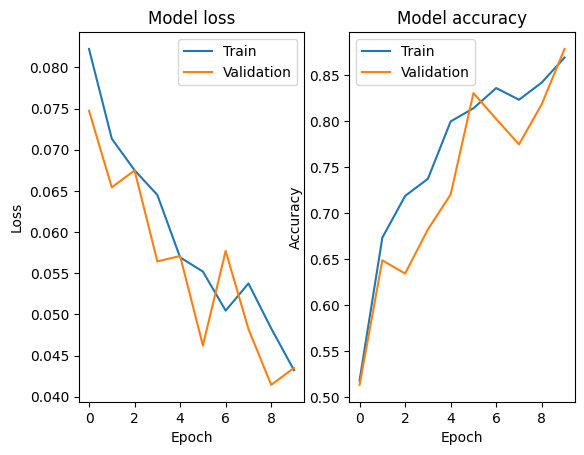

In [136]:
# Plot training & validation loss values
plt.subplot(1, 2, 1)
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [137]:
loss,accuracy = mlp.evaluate(X_test,Y_test)
print(loss,accuracy)

0.04361463232046498 0.8735


In [138]:
from sklearn.metrics import classification_report

# Assuming you have already calculated Y_pred using your MLP model
Y_pred = mlp.predict(X_test)

# Generate classification report
report = classification_report(np.argmax(Y_test, axis=1), Y_pred)

print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       629
           1       0.78      0.88      0.83       573
           2       0.80      0.87      0.83       619
           3       0.85      0.87      0.86       619
           4       0.87      0.97      0.92       585
           5       0.98      0.80      0.88       594
           6       0.95      0.96      0.95       629
           7       0.90      0.86      0.88       594
           8       0.90      0.91      0.91       581
           9       0.89      0.69      0.78       577

    accuracy                           0.87      6000
   macro avg       0.88      0.87      0.87      6000
weighted avg       0.88      0.87      0.87      6000



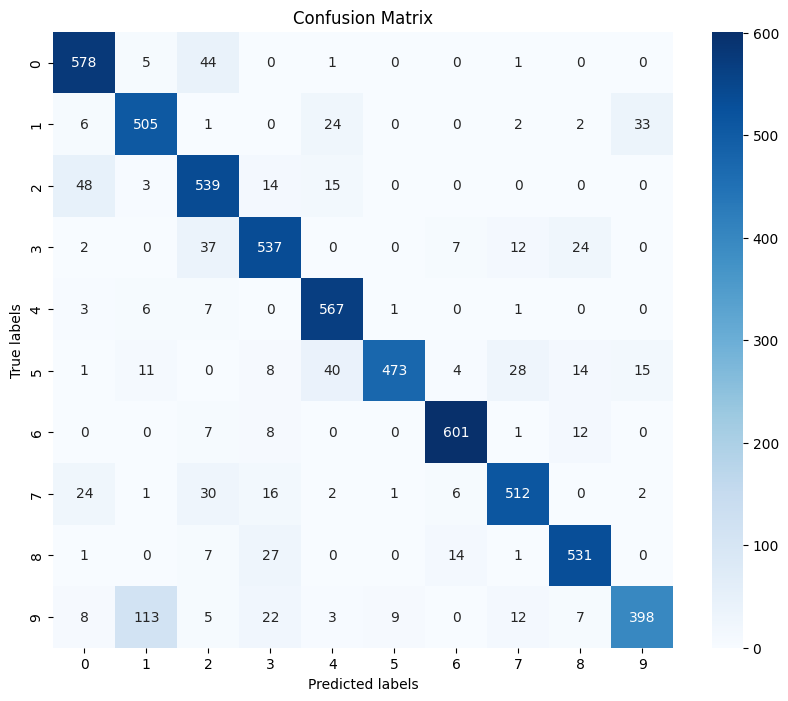

In [139]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already calculated Y_pred using your MLP model
Y_pred = mlp.predict(X_test)

# Calculate confusion matrix
cm = confusion_matrix(np.argmax(Y_test, axis=1), Y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


### 2  Layer Sigmoid (H1=23, H2=23)

In [140]:
num_features = X_train.shape[1]
num_classes = 10
hidden_sizes = [int((num_features + num_classes) / 2),23]
activations = ['bipolar_sigmoid','bipolar_sigmoid', 'softmax']

mlp = MLP(input_size=num_features, hidden_sizes=hidden_sizes, output_size=num_classes,activations=activations)
history = mlp.train(X_train, Y_train, validation_split=0.2, epochs=10, learning_rate=0.001)
predictions = mlp.predict(X_test)

Epoch 10/10: 100%|██████████| 600/600 [00:59<00:00, 10.03it/s, train_loss=0.0671, train_accuracy=0.65, val_loss=0.0652, val_accuracy=0.632]


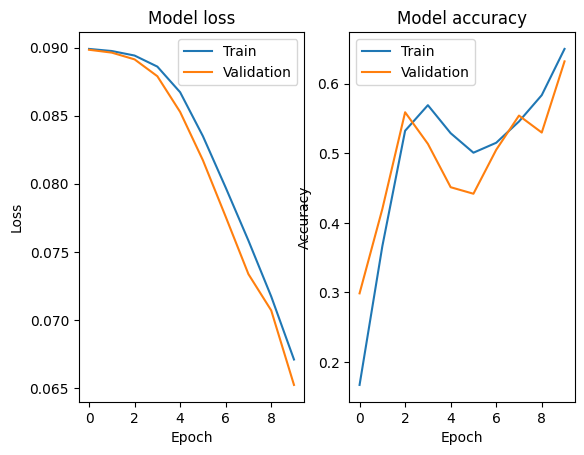

In [141]:
# Plot training & validation loss values
plt.subplot(1, 2, 1)
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [142]:
loss,accuracy = mlp.evaluate(X_test,Y_test)
print(loss,accuracy)

0.06506172166143247 0.6373333333333333


In [143]:
from sklearn.metrics import classification_report

# Assuming you have already calculated Y_pred using your MLP model
Y_pred = mlp.predict(X_test)

# Generate classification report
report = classification_report(np.argmax(Y_test, axis=1), Y_pred)

print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

           0       0.42      0.97      0.59       629
           1       0.41      0.96      0.57       573
           2       0.87      0.51      0.64       619
           3       0.91      0.81      0.86       619
           4       0.62      0.91      0.74       585
           5       0.99      0.18      0.30       594
           6       0.92      0.95      0.94       629
           7       0.38      0.01      0.02       594
           8       0.95      0.86      0.90       581
           9       0.76      0.18      0.29       577

    accuracy                           0.64      6000
   macro avg       0.72      0.63      0.58      6000
weighted avg       0.73      0.64      0.59      6000



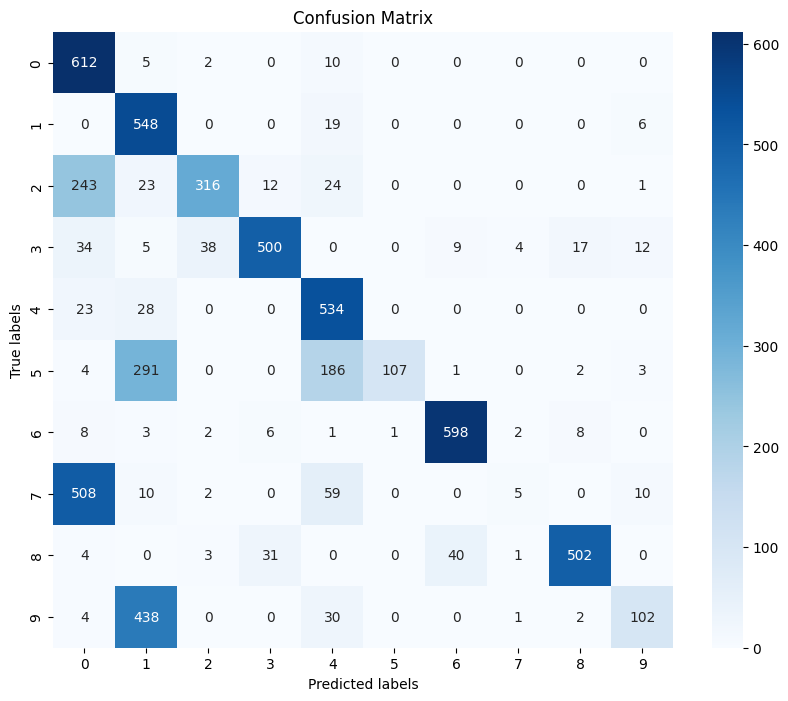

In [144]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already calculated Y_pred using your MLP model
Y_pred = mlp.predict(X_test)

# Calculate confusion matrix
cm = confusion_matrix(np.argmax(Y_test, axis=1), Y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


### 2  Layer Sigmoid (H1=24, H2=18)

In [145]:
num_features = X_train.shape[1]
num_classes = 10
hidden_sizes = [int(num_features *2 / 3),int(num_features / 2)]
activations = ['bipolar_sigmoid','bipolar_sigmoid', 'softmax']

mlp = MLP(input_size=num_features, hidden_sizes=hidden_sizes, output_size=num_classes,activations=activations)
history = mlp.train(X_train, Y_train, validation_split=0.2, epochs=10, learning_rate=0.001)
predictions = mlp.predict(X_test)

Epoch 10/10: 100%|██████████| 600/600 [02:35<00:00,  3.86it/s, train_loss=0.0138, train_accuracy=0.964, val_loss=0.00991, val_accuracy=0.943]


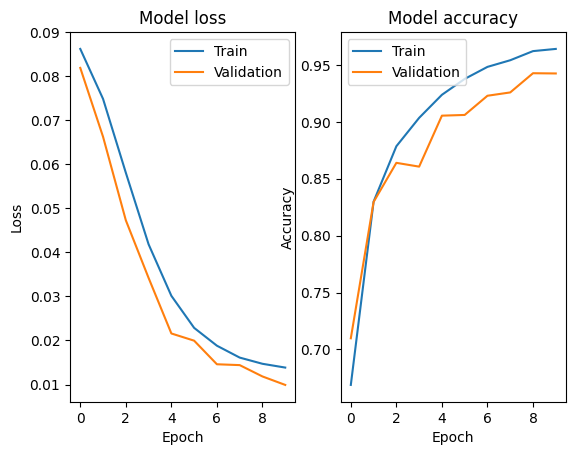

In [146]:
# Plot training & validation loss values
plt.subplot(1, 2, 1)
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [147]:
loss,accuracy = mlp.evaluate(X_test,Y_test)
print(loss,accuracy)

0.01179963937971008 0.9448333333333333


In [148]:
from sklearn.metrics import classification_report

# Assuming you have already calculated Y_pred using your MLP model
Y_pred = mlp.predict(X_test)

# Generate classification report
report = classification_report(np.argmax(Y_test, axis=1), Y_pred)

print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       629
           1       0.95      0.89      0.92       573
           2       0.95      0.91      0.93       619
           3       0.91      0.97      0.94       619
           4       0.96      0.98      0.97       585
           5       0.98      0.95      0.96       594
           6       0.97      0.97      0.97       629
           7       0.94      0.97      0.96       594
           8       0.97      0.91      0.94       581
           9       0.89      0.93      0.91       577

    accuracy                           0.94      6000
   macro avg       0.95      0.94      0.94      6000
weighted avg       0.95      0.94      0.94      6000



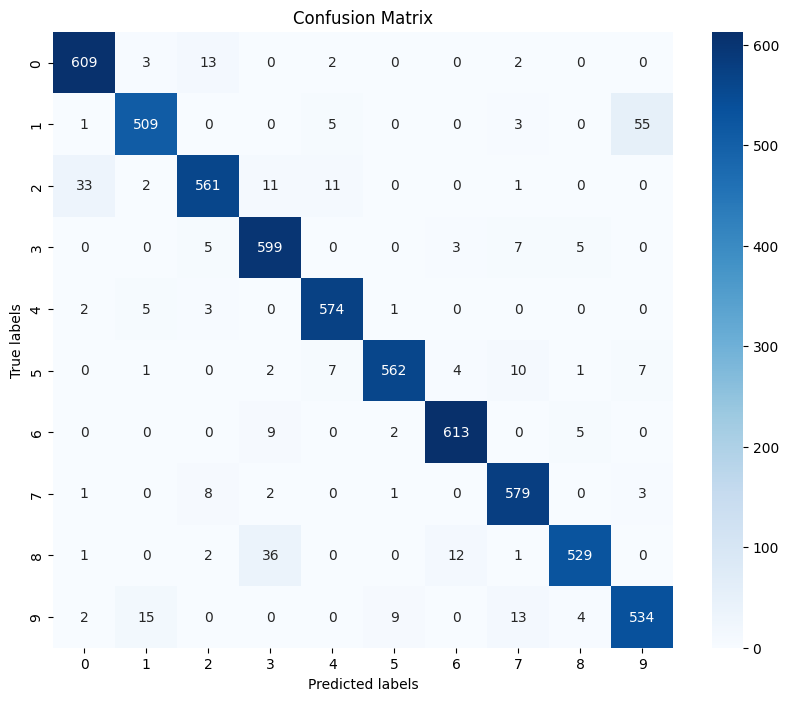

In [149]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already calculated Y_pred using your MLP model
Y_pred = mlp.predict(X_test)

# Calculate confusion matrix
cm = confusion_matrix(np.argmax(Y_test, axis=1), Y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


### 2  Layer Sigmoid (H1=18, H2=12)

In [150]:
num_features = X_train.shape[1]
num_classes = 10
hidden_sizes = [int(num_features / 2),int(num_features  / 3)]
activations = ['bipolar_sigmoid','bipolar_sigmoid', 'softmax']

mlp = MLP(input_size=num_features, hidden_sizes=hidden_sizes, output_size=num_classes,activations=activations)
history = mlp.train(X_train, Y_train, validation_split=0.2, epochs=10, learning_rate=0.001)
predictions = mlp.predict(X_test)

Epoch 10/10: 100%|██████████| 600/600 [01:44<00:00,  5.73it/s, train_loss=0.0165, train_accuracy=0.953, val_loss=0.0127, val_accuracy=0.934]


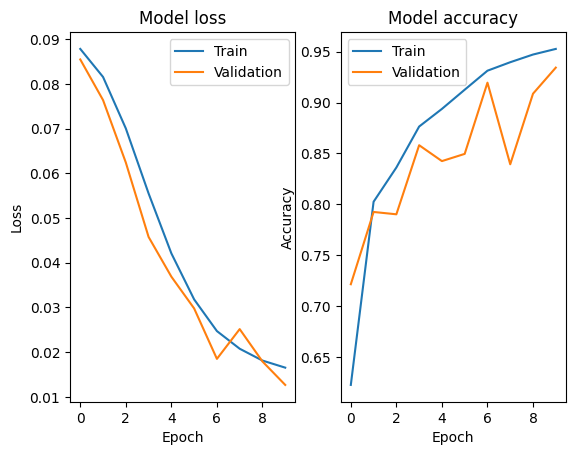

In [151]:
# Plot training & validation loss values
plt.subplot(1, 2, 1)
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [152]:
loss,accuracy = mlp.evaluate(X_test,Y_test)
print(loss,accuracy)

0.012579275729363688 0.9373333333333334


In [153]:
from sklearn.metrics import classification_report

# Assuming you have already calculated Y_pred using your MLP model
Y_pred = mlp.predict(X_test)

# Generate classification report
report = classification_report(np.argmax(Y_test, axis=1), Y_pred)

print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.93      0.96       629
           1       0.89      0.94      0.91       573
           2       0.87      0.94      0.91       619
           3       0.95      0.93      0.94       619
           4       0.95      0.98      0.96       585
           5       0.96      0.98      0.97       594
           6       0.98      0.96      0.97       629
           7       0.97      0.90      0.93       594
           8       0.90      0.96      0.93       581
           9       0.95      0.84      0.89       577

    accuracy                           0.94      6000
   macro avg       0.94      0.94      0.94      6000
weighted avg       0.94      0.94      0.94      6000



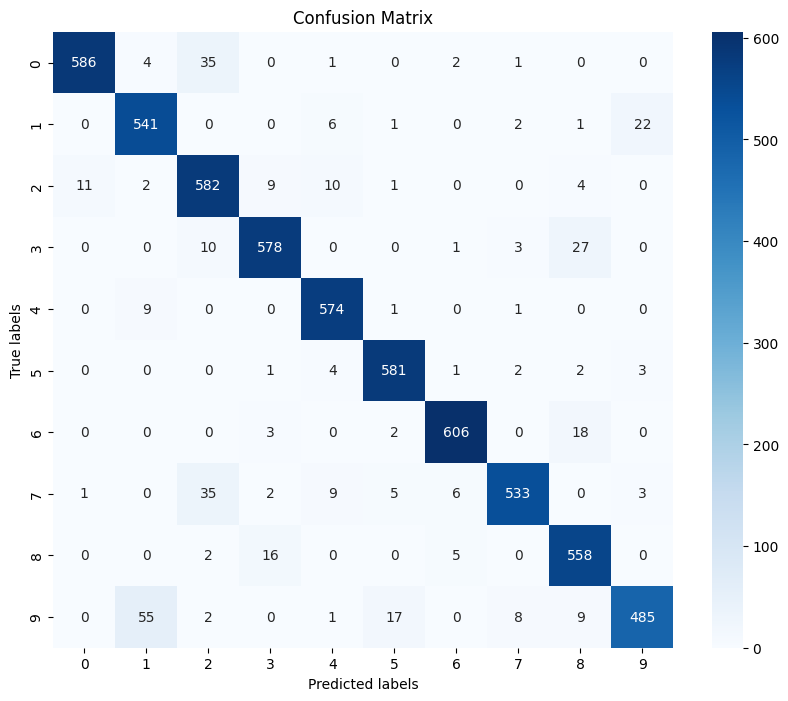

In [154]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already calculated Y_pred using your MLP model
Y_pred = mlp.predict(X_test)

# Calculate confusion matrix
cm = confusion_matrix(np.argmax(Y_test, axis=1), Y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


### 1 Layer ReLu (H=23)

In [155]:
num_features = X_train.shape[1]
num_classes = 10
hidden_sizes = [int((num_features + num_classes) / 2)]
activations = ['relu', 'softmax']

mlp = MLP(input_size=num_features, hidden_sizes=hidden_sizes, output_size=num_classes,activations=activations)
history = mlp.train(X_train, Y_train, validation_split=0.2, epochs=10, learning_rate=0.001)
predictions = mlp.predict(X_test)

Epoch 10/10: 100%|██████████| 600/600 [00:54<00:00, 10.99it/s, train_loss=0.09, train_accuracy=0.107, val_loss=0.09, val_accuracy=0.102]


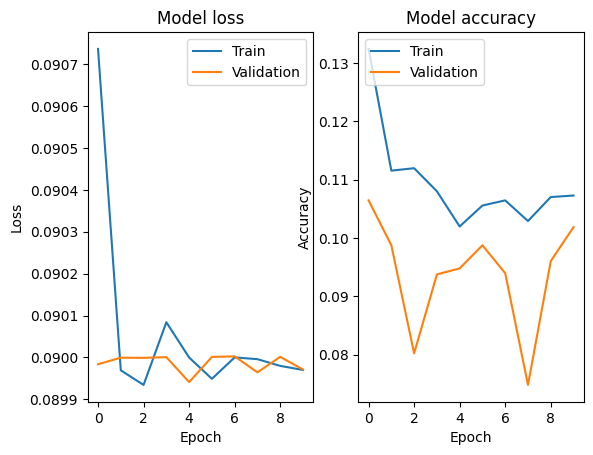

In [156]:
# Plot training & validation loss values
plt.subplot(1, 2, 1)
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [157]:
loss,accuracy = mlp.evaluate(X_test,Y_test)
print(loss,accuracy)

0.08997778396731683 0.11683333333333333


In [158]:
from sklearn.metrics import classification_report

# Assuming you have already calculated Y_pred using your MLP model
Y_pred = mlp.predict(X_test)

# Generate classification report
report = classification_report(np.argmax(Y_test, axis=1), Y_pred)

print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

           0       0.09      0.68      0.16       629
           1       0.10      0.05      0.06       573
           2       0.00      0.00      0.00       619
           3       0.00      0.00      0.00       619
           4       0.07      0.00      0.00       585
           5       0.23      0.41      0.30       594
           6       0.00      0.00      0.00       629
           7       0.00      0.00      0.00       594
           8       0.50      0.00      0.00       581
           9       0.00      0.00      0.00       577

    accuracy                           0.12      6000
   macro avg       0.10      0.11      0.05      6000
weighted avg       0.10      0.12      0.05      6000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


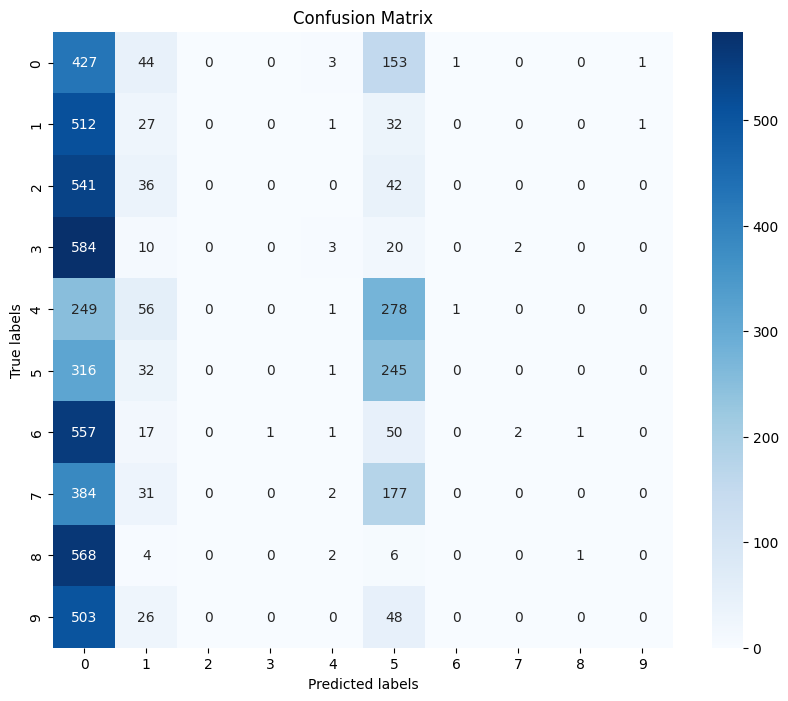

In [159]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already calculated Y_pred using your MLP model
Y_pred = mlp.predict(X_test)

# Calculate confusion matrix
cm = confusion_matrix(np.argmax(Y_test, axis=1), Y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


### 2  Layer ReLu (H1=23, H2=23)

In [160]:
num_features = X_train.shape[1]
num_classes = 10
hidden_sizes = [int((num_features + num_classes) / 2),23]
activations = ['relu','relu', 'softmax']

mlp = MLP(input_size=num_features, hidden_sizes=hidden_sizes, output_size=num_classes,activations=activations)
history = mlp.train(X_train, Y_train, validation_split=0.2, epochs=10, learning_rate=0.001)
predictions = mlp.predict(X_test)

Epoch 10/10: 100%|██████████| 600/600 [00:56<00:00, 10.64it/s, train_loss=0.0239, train_accuracy=0.881, val_loss=0.0153, val_accuracy=0.895]


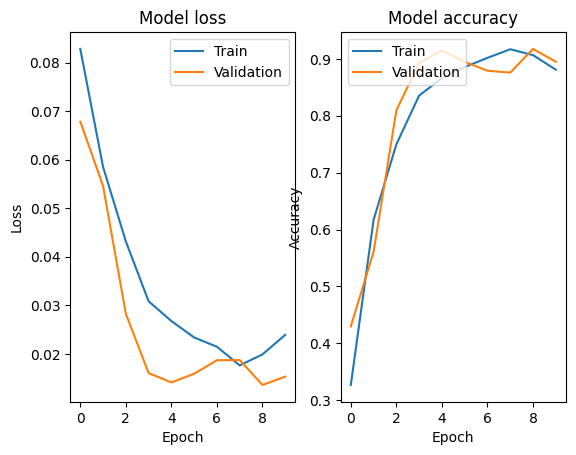

In [161]:
# Plot training & validation loss values
plt.subplot(1, 2, 1)
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [162]:
loss,accuracy = mlp.evaluate(X_test,Y_test)
print(loss,accuracy)

0.013139505077736877 0.9251666666666667


In [163]:
from sklearn.metrics import classification_report

# Assuming you have already calculated Y_pred using your MLP model
Y_pred = mlp.predict(X_test)

# Generate classification report
report = classification_report(np.argmax(Y_test, axis=1), Y_pred)

print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       629
           1       0.98      0.81      0.88       573
           2       0.94      0.88      0.91       619
           3       0.96      0.89      0.92       619
           4       0.95      0.99      0.97       585
           5       0.97      0.94      0.95       594
           6       0.93      0.98      0.95       629
           7       0.99      0.88      0.93       594
           8       0.82      0.98      0.89       581
           9       0.82      0.95      0.88       577

    accuracy                           0.93      6000
   macro avg       0.93      0.92      0.92      6000
weighted avg       0.93      0.93      0.93      6000



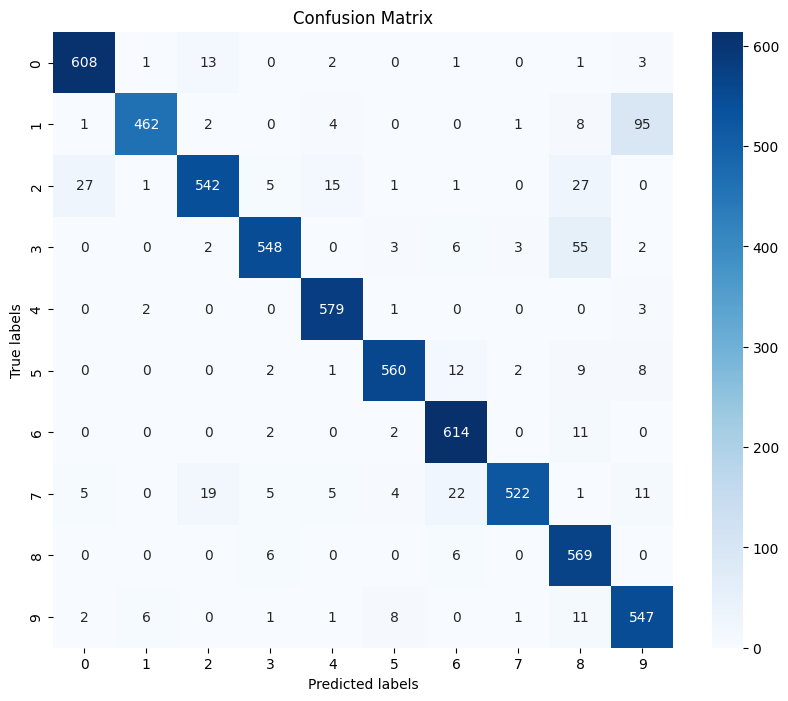

In [164]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already calculated Y_pred using your MLP model
Y_pred = mlp.predict(X_test)

# Calculate confusion matrix
cm = confusion_matrix(np.argmax(Y_test, axis=1), Y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


### 2  Layer ReLu (H1=24, H2=18)

In [165]:
num_features = X_train.shape[1]
num_classes = 10
hidden_sizes = [int(num_features *2 / 3),int(num_features / 2)]
activations = ['relu','relu', 'softmax']

mlp = MLP(input_size=num_features, hidden_sizes=hidden_sizes, output_size=num_classes,activations=activations)
history = mlp.train(X_train, Y_train, validation_split=0.2, epochs=10, learning_rate=0.001)
predictions = mlp.predict(X_test)

Epoch 10/10: 100%|██████████| 600/600 [01:51<00:00,  5.36it/s, train_loss=0.0191, train_accuracy=0.913, val_loss=0.00924, val_accuracy=0.939]


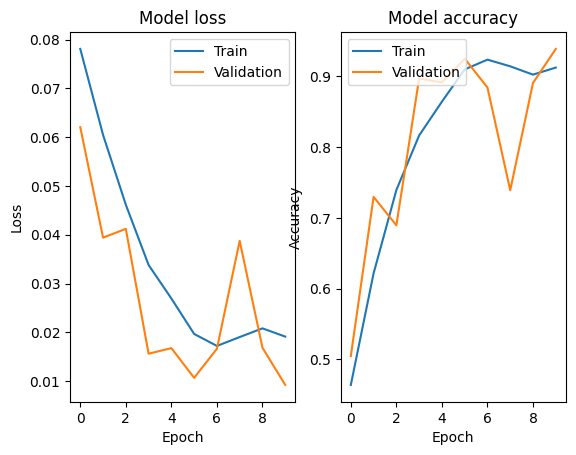

In [166]:
# Plot training & validation loss values
plt.subplot(1, 2, 1)
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [167]:
loss,accuracy = mlp.evaluate(X_test,Y_test)
print(loss,accuracy)

0.00938378181573849 0.9388333333333333


In [168]:
from sklearn.metrics import classification_report

# Assuming you have already calculated Y_pred using your MLP model
Y_pred = mlp.predict(X_test)

# Generate classification report
report = classification_report(np.argmax(Y_test, axis=1), Y_pred)

print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.87      0.93       629
           1       0.99      0.81      0.89       573
           2       0.87      0.96      0.91       619
           3       0.96      0.96      0.96       619
           4       0.94      1.00      0.97       585
           5       0.90      0.99      0.95       594
           6       0.98      0.97      0.97       629
           7       0.95      0.96      0.95       594
           8       0.95      0.96      0.95       581
           9       0.87      0.92      0.89       577

    accuracy                           0.94      6000
   macro avg       0.94      0.94      0.94      6000
weighted avg       0.94      0.94      0.94      6000



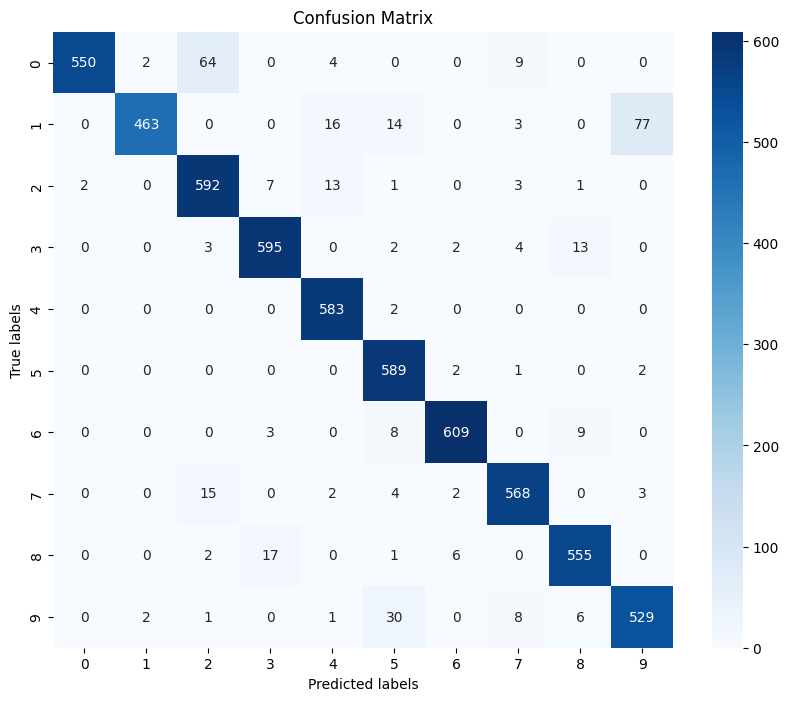

In [169]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already calculated Y_pred using your MLP model
Y_pred = mlp.predict(X_test)

# Calculate confusion matrix
cm = confusion_matrix(np.argmax(Y_test, axis=1), Y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


### 2  Layer ReLu (H1=18, H2=12)

In [170]:
num_features = X_train.shape[1]
num_classes = 10
hidden_sizes = [int(num_features / 2),int(num_features  / 3)]
activations = ['relu','relu', 'softmax']

mlp = MLP(input_size=num_features, hidden_sizes=hidden_sizes, output_size=num_classes,activations=activations)
history = mlp.train(X_train, Y_train, validation_split=0.2, epochs=10, learning_rate=0.001)
predictions = mlp.predict(X_test)

Epoch 10/10: 100%|██████████| 600/600 [01:18<00:00,  7.62it/s, train_loss=0.0356, train_accuracy=0.808, val_loss=0.0123, val_accuracy=0.922]


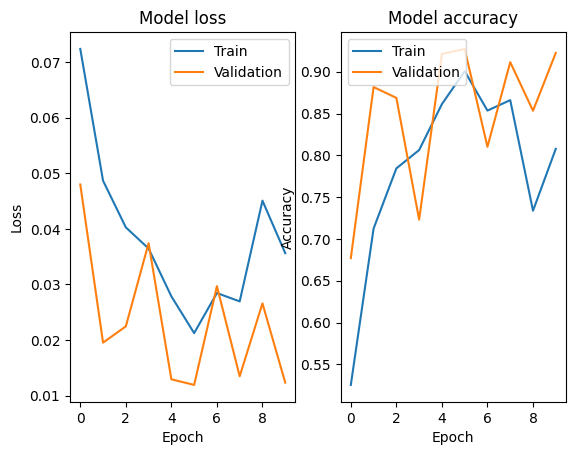

In [171]:
# Plot training & validation loss values
plt.subplot(1, 2, 1)
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [172]:
loss,accuracy = mlp.evaluate(X_test,Y_test)
print(loss,accuracy)

0.011601766704275093 0.9303333333333333


In [173]:
from sklearn.metrics import classification_report

# Assuming you have already calculated Y_pred using your MLP model
Y_pred = mlp.predict(X_test)

# Generate classification report
report = classification_report(np.argmax(Y_test, axis=1), Y_pred)

print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       629
           1       0.98      0.83      0.90       573
           2       0.94      0.87      0.90       619
           3       0.95      0.89      0.92       619
           4       0.95      0.99      0.97       585
           5       0.97      0.96      0.96       594
           6       0.95      0.97      0.96       629
           7       0.88      0.98      0.93       594
           8       0.93      0.92      0.93       581
           9       0.84      0.93      0.88       577

    accuracy                           0.93      6000
   macro avg       0.93      0.93      0.93      6000
weighted avg       0.93      0.93      0.93      6000



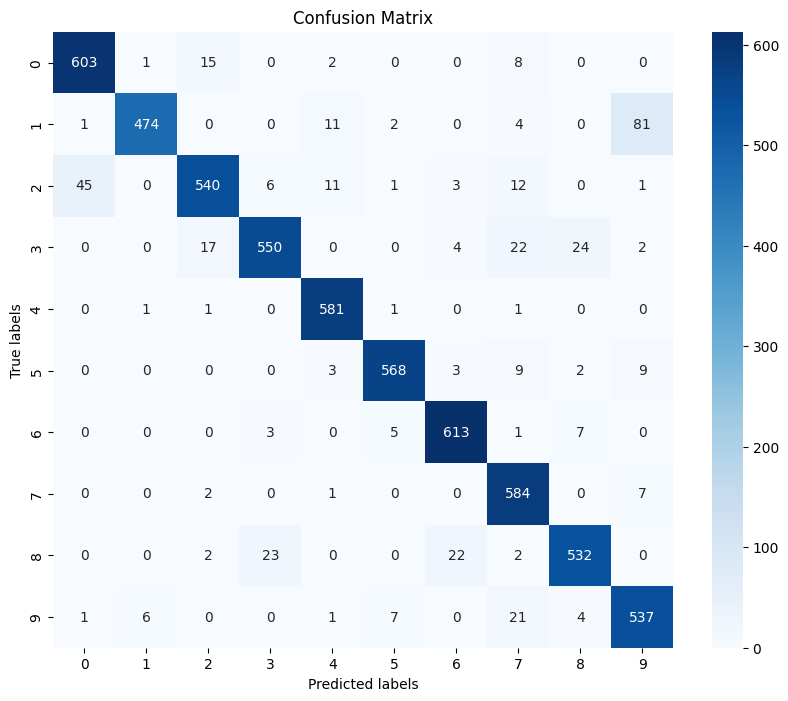

In [174]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already calculated Y_pred using your MLP model
Y_pred = mlp.predict(X_test)

# Calculate confusion matrix
cm = confusion_matrix(np.argmax(Y_test, axis=1), Y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()
